### 03/27/2018: Python : Dictionaries and Intro to Signal Processing

#### Dictionaries:



They are native to Python and are basically hash maps. A hash map has keys and values. Each key has its own value.

In [8]:
circuit = {"V_node1_to_node2" : 1.0, 
           "I_node1_to_node2" : 3.0, 
           "P_node1_to_node2" : 3.0,}

print(type(circuit))
print(circuit)

<class 'dict'>
{'V_node1_to_node2': 1.0, 'P_node1_to_node2': 3.0, 'I_node1_to_node2': 3.0}


Sometimes having strings as keys is more informative and easier to use for the programmer.

In [9]:
# find the voltage drop between node1 and node2
# simple!

print('Voltage drop between node1 and node2: '+str(circuit['V_node1_to_node2'])+'V')

Voltage drop between node1 and node2: 1.0V


In [4]:
# update the voltage drop between node1 and node2 to 2V
# update the power because the voltage has changed

circuit['V_node1_to_node2'] = 2
circuit['P_node1_to_node2'] = circuit['I_node1_to_node2']*circuit['V_node1_to_node2']

print('Voltage drop between node1 and node2\t\t: \t'+str(circuit['V_node1_to_node2'])+'V')
print('Current between node1 and node2\t\t\t: \t'+str(circuit['I_node1_to_node2'])+'A')
print('Power dissipated between node1 and node2\t: \t'+str(circuit['P_node1_to_node2'])+'W')

Voltage drop between node1 and node2		: 	2V
Current between node1 and node2			: 	3.0A
Power dissipated between node1 and node2	: 	6.0W


In [5]:
# finding out the elements of this circuit

print(circuit.keys()); print('\n')

for circuit_element in circuit.keys():
    print(circuit_element,circuit[circuit_element])

dict_keys(['V_node1_to_node2', 'I_node1_to_node2', 'P_node1_to_node2'])


V_node1_to_node2 2
I_node1_to_node2 3.0
P_node1_to_node2 6.0


##### Important:

The keys need to be immutable. This means that only the value a key stores can be changed and the key cannot be changed itself. 
In the example below, each coordinate pair with respect to the usual Cartesian basis, is identified with a quadrant. 
A tuple needs to be used to identify the point. A list cannot be used since it is mutable!

In [8]:
cartesian = {(0, 1) : 'I', (1, 1) : 'I', (-1, 3) : 'II', (-1, -5) : 'III' }
print(cartesian)

{(0, 1): 'I', (1, 1): 'I', (-1, 3): 'II', (-1, -5): 'III'}


In [9]:
cartesian = {[0, 1] : 'I', [1, 1] : 'I', [-1, 3] : 'II', [-1, -5] : 'III' }
print(cartesian)

TypeError: unhashable type: 'list'

#### Functions:

In [10]:
def my_function(my_arg1, my_arg2):
    my_arg1 = my_arg1 + 1
    return [my_arg1, my_arg2]

a, b = my_function(5,10)
print(a, b)

6 10


Nested Functions:

In [11]:
def printECE(course_no):
    def ECE():
        return 'ECE'
    return ECE() + str(course_no)

printECE(210)

'ECE210'

#### The Fast Fourier Transform (FFT)

The FFT is one of the greatest algorithms ever designed. Running in O(nlogn) time, it is an indispensible tool for an electrical engineer.

Consider the function<br> $f(t) =\left\{
                \begin{array}{ll}
                  1 & -0.5\le t \le 0.5\\
                  0 & else\\
                \end{array}
              \right.
                          $

Let us take 256 samples from -1 to 1 of the above function.

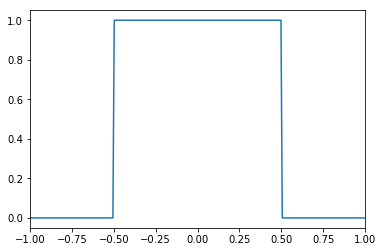

In [34]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

f = np.zeros(256)
f[64:64+128] = 1

#index 64 corresponds to t = -0.5
#index 191 corresponds to t = 0.5

t = np.linspace(-1, 1, 256)
plt.figure(1)
plt.plot(t, f)
plt.xlim([-1, 1])
plt.show()

Now let us take the Fourier Transform of this function using the FFT. 

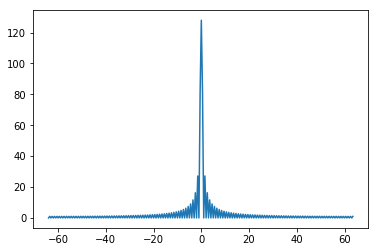

In [32]:
F = np.fft.fft(f)
F = np.fft.fftshift(F)

sampling_rate = 128 
w = np.fft.fftfreq(256, d = 1/sampling_rate)
w = np.fft.fftshift(w)
plt.figure(2)
plt.plot(w, np.abs(F))
plt.show()

#### EXERCISES:

#### Exercise 1:

- given the locations of points a, b, c, d, e, 
    - find the distance between each point 
    - find the direction between each point(as a unit vector)

- give the output in the form:
    - point a to point b, distance : 1.73 	direction: 0.58, 0.58, 0.58
    - point a to point c, distance : 1.41 	direction: 0.71, -0.71, 0.00
    - point a to point d, distance : 11.36 	direction: -0.44, 0.88, 0.18
    - point a to point e, distance : 3.32 	direction: 0.30, 0.90, 0.30
    - point b to point a, distance : 1.73 	direction: -0.58, -0.58, -0.58
    - point b to point c, distance : 2.24 	direction: 0.00, -0.89, -0.45
    - point b to point d, distance : 10.86 	direction: -0.55, 0.83, 0.09
    - point b to point e, distance : 2.00 	direction: 0.00, 1.00, 0.00
    - point c to point a, distance : 1.41 	direction: -0.71, 0.71, 0.00
    - point c to point b, distance : 2.24 	direction: 0.00, 0.89, 0.45
    - point c to point d, distance : 12.69 	direction: -0.47, 0.87, 0.16
    - point c to point e, distance : 4.12 	direction: 0.00, 0.97, 0.24
    - point d to point a, distance : 11.36 	direction: 0.44, -0.88, -0.18
    - point d to point b, distance : 10.86 	direction: 0.55, -0.83, -0.09
    - point d to point c, distance : 12.69 	direction: 0.47, -0.87, -0.16

- please use formatted string to display all floating point numbers to 2 decimal places

In [32]:
a = np.array([0.,0.,0.])
b = np.array([1.,1.,1.])
c = np.array([1.,-1.,0.])
d = np.array([-5.,10.,2.])
e = np.array([1.,3.,1.])

In [20]:
# you have the option of writing the entire code from scratch or to use the following hints
# use hint0, saves you some work

'''<---------- writing code from scratch  ------------------------->'''

import numpy as np
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import math
ab = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)
dir_ab = np.array([(b[0] - a[0])/ab, (b[1] - a[1])/ab, (b[2] - a[2])/ab])
print ("point a to point b, distance :", ab, " direction: ", dir_ab)

ac = math.sqrt((a[0] - c[0])**2 + (a[1] - c[1])**2 + (a[2] - c[2])**2)
dir_ac = np.array([(c[0] - a[0])/ac, (c[1] - a[1])/ac, (c[2] - a[2])/ac])
print ("point a to point c, distance :", ac, " direction: ", dir_ac)

ad = math.sqrt((a[0] - d[0])**2 + (a[1] - d[1])**2 + (a[2] - d[2])**2)
dir_ad = np.array([(d[0] - a[0])/ad, (d[1] - a[1])/ad, (d[2] - a[2])/ad])
print ("point a to point d, distance :", ad, " direction: ", dir_ad)

ae = math.sqrt((a[0] - e[0])**2 + (a[1] - e[1])**2 + (a[2] - e[2])**2)
dir_ae = np.array([(e[0] - a[0])/ae, (e[1] - a[1])/ae, (e[2] - a[2])/ae])
print ("point a to point e, distance :", ae, " direction: ", dir_ae)

bc = math.sqrt((b[0] - c[0])**2 + (b[1] - c[1])**2 + (b[2] - c[2])**2)
dir_bc = np.array([(c[0] - b[0])/bc, (c[1] - b[1])/bc, (c[2] - b[2])/bc])
print ("point b to point c, distance :", bc, " direction: ", dir_bc)

bd = math.sqrt((b[0] - d[0])**2 + (b[1] - d[1])**2 + (b[2] - d[2])**2)
dir_bd = np.array([(d[0] - b[0])/bd, (d[1] - b[1])/bd, (d[2] - b[2])/bd])
print ("point b to point d, distance :", bd, " direction: ", dir_bd)

be = math.sqrt((b[0] - e[0])**2 + (b[1] - e[1])**2 + (b[2] - e[2])**2)
dir_be = np.array([(e[0] - b[0])/be, (e[1] - b[1])/be, (e[2] - b[2])/be])
print ("point b to point c, distance :", bc, " direction: ", dir_bc)

cd = math.sqrt((c[0] - d[0])**2 + (c[1] - d[1])**2 + (c[2] - d[2])**2)
dir_cd = np.array([(d[0] - c[0])/cd, (d[1] - c[1])/cd, (d[2] - c[2])/cd])
print ("point c to point d, distance :", cd, " direction: ", dir_cd)

ce = math.sqrt((c[0] - e[0])**2 + (c[1] - e[1])**2 + (c[2] - e[2])**2)
dir_ce = np.array([(e[0] - c[0])/ce, (e[1] - c[1])/ce, (e[2] - c[2])/ce])
print ("point c to point e, distance :", ce, " direction: ", dir_ce)







point a to point b, distance : 1.7320508075688772  direction:  [0.57735027 0.57735027 0.57735027]
point a to point c, distance : 1.4142135623730951  direction:  [ 0.70710678 -0.70710678  0.        ]
point a to point d, distance : 11.357816691600547  direction:  [-0.44022545  0.88045091  0.17609018]
point a to point e, distance : 3.3166247903554  direction:  [0.30151134 0.90453403 0.30151134]
point b to point c, distance : 2.23606797749979  direction:  [ 0.         -0.89442719 -0.4472136 ]
point b to point d, distance : 10.862780491200215  direction:  [-0.55234477  0.82851716  0.09205746]
point b to point c, distance : 2.23606797749979  direction:  [ 0.         -0.89442719 -0.4472136 ]
point c to point d, distance : 12.68857754044952  direction:  [-0.47286624  0.86692145  0.15762208]
point c to point e, distance : 4.123105625617661  direction:  [0.         0.9701425  0.24253563]


In [1]:
# hint 0: the following functions have been written for you if you choose to use them

import numpy as np
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import math
def distance(point_a, point_b):
    ''' given 2 np.arrays, returns the geometric distance between them '''
    return math.sqrt(np.dot(point_b-point_a,point_b-point_a))

def direction(point_a, point_b):
    ''' given 2 np.arrays, returns the direction from point a to point b '''
    return (point_b-point_a)/distance(point_a, point_b)

In [2]:
# hint 1: create a dictionary of points and call it points
# have the key as the point name eg. 'a'
# have the value as the location of the point np.array([0.,0.,0.])
import numpy as np
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import math
'''<---------- code ----------->'''
points = dict ({"a":np.array([0,0,0]), "b":np.array([1,1,1]), "c":np.array([1,-1,0]), "d":np.array([-5,10,2]), "e":np.array([1,3,1])})
print (points)

{'b': array([1, 1, 1]), 'd': array([-5, 10,  2]), 'a': array([0, 0, 0]), 'e': array([1, 3, 1]), 'c': array([ 1, -1,  0])}


In [41]:
# hint 2: points.keys() will return the keys that you have in the dictionary points
# in other words, it will return 'a','b','c','d','e' but in any order, so use sorted(points.keys()) to have them sorted
import numpy as np
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import math
sorted(points.keys()) # modify this



['a', 'b', 'c', 'd', 'e']

In [3]:
# find the keys that you want to use, 
# the first set should be fix, 
# the second set should depend on the point you are using in the first set

# hint 2.1: if not(point_1 == point_2):
# where should you insert this statement?

# hint 3: use a nested for-loop, you can actually iterate through the keys like this.
# You will need to modify the body of the loops.

import numpy as np
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import math
set1 = sorted(points.keys())
set2 = sorted(points.keys())
for point_1 in set1:    
    for point_2 in set2:
        if (point_1 != point_2):
            dist = distance(points[point_1], points[point_2])
            dir = direction(points[point_1], points[point_2])
            print("point {} to point {}, distance: {} direction: {}". format(point_1, point_2, round(dist, 2), np.round(dir, 2)))


point a to point b, distance: 1.73 direction: [0.58 0.58 0.58]
point a to point c, distance: 1.41 direction: [ 0.71 -0.71  0.  ]
point a to point d, distance: 11.36 direction: [-0.44  0.88  0.18]
point a to point e, distance: 3.32 direction: [0.3 0.9 0.3]
point b to point a, distance: 1.73 direction: [-0.58 -0.58 -0.58]
point b to point c, distance: 2.24 direction: [ 0.   -0.89 -0.45]
point b to point d, distance: 10.86 direction: [-0.55  0.83  0.09]
point b to point e, distance: 2.0 direction: [0. 1. 0.]
point c to point a, distance: 1.41 direction: [-0.71  0.71  0.  ]
point c to point b, distance: 2.24 direction: [0.   0.89 0.45]
point c to point d, distance: 12.69 direction: [-0.47  0.87  0.16]
point c to point e, distance: 4.12 direction: [0.   0.97 0.24]
point d to point a, distance: 11.36 direction: [ 0.44 -0.88 -0.18]
point d to point b, distance: 10.86 direction: [ 0.55 -0.83 -0.09]
point d to point c, distance: 12.69 direction: [ 0.47 -0.87 -0.16]
point d to point e, distance:

#### Exercise 2:

Let $s(t) = sinc(10t)$.<br>
Sample the signal with a sampling period of 1/128 from t = -10 to 10. Then plot the FFT of the signal. What do you expect?

In [ ]:
# Create the array of sampling points
%matplotlib inline
import numpy as np
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import math
t = np.arange(-10, 10, 1/128)

# Sample the signal s(t)

'''<---------- code ----------->'''
sample = np.sinc(10*t)
print(sample)

# Take the 4800 point FFT of s

'''<---------- code ----------->'''
FFT  =np.fft.fft(sample, 4800)
print("FFT = {}". format(FFT))

# Create the array of frequencies. There are 4800 points with sampling period of 1/128

'''<---------- code ----------->'''
freq = np.linspace(-2 * np.pi, 2 * np.pi, 4800)
print("freq = {}". format(freq))
FFT = np.fft.fftshift(FFT)
mag = np.abs(FFT)
print("mag = {}". format(mag))

# Plot the magnitude of the FFT

'''<---------- code ----------->'''
plt.plot(freq,mag)
plt.show()